# Master Thesis Pre-Analysis of the Data 

**Author**: Karin Thommen

**Date**: March 2023 


---

**Content of the Notebook**: Analysis of the Data (Spontaneous and prepared Speech) 

---

### Setup


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Build connection to data folder on GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Prepared Speech

The following dataset is the SDS-200 dataset: A Speech-to-Text Corpus for Swiss German

For more information and to get the dataset: https://swissnlp.org/datasets/ 


In [3]:
# load tsv file with the information about all audio clips and the annotation
data_info=pd.read_csv("/content/drive/MyDrive/Masterarbeit/Data/SDS-200/SDS-200 Corpus/export_20211220.tsv",sep='\t')

In [4]:
# load README for information about the columns in the data file 
with open('/content/drive/MyDrive/Masterarbeit/Data/SDS-200/SDS-200 Corpus/README_columns.txt') as readme:
    print(readme.read())

clip_id: unique clip identifier
clip_path: path to Swiss German clip in clip tar / folder
sentence: Standard German sentence
clip_created_at: creation date of clip
clip_is_valid: True (clip was validated as a correct Swiss German representation of the Standard German sentence by two or more users, see clip_n_votes_correct), False (clip was validated as NOT a correct Swiss German representation of the Standard German sentence by two or more users, see clip_n_votes_false) or empty string (not enough votes to decide)
sentence_id: unique sentence identifier
sentence_source: source of the sentence, tamedia_sentences = Swiss newspapers, cv_sentences = German Common Voice texts
client_id: unique speaker identifier (Warning: the same person may have gotten multiple ids when using the webapp on different occasions without registering. Also, the same person may have gotten multiple ids when using the webapp as an unregistered as well as a registered user.)
zipcode: zipcode of the origin municipa

In [5]:
data_info.head(5)

,clip_id,clip_path,sentence,clip_created_at,clip_is_valid,sentence_id,sentence_source,client_id,zipcode,canton,user_mean_clip_quality,clip_n_votes_correct,clip_n_votes_false,clip_n_times_reported,sentence_n_times_reported,age,gender
0,42805,5d4e4352-a9e5-4f52-939b-2792af05bd69/0f76f1303...,Die Kosten der Zuwanderung zahlt der Mittelstand.,2021-07-15 15:13:59,True,0f76f130372e7035a669f10205ec23b15ddb95184c7c86...,tamedia_sentences,5d4e4352-a9e5-4f52-939b-2792af05bd69,NaN,NaN,0.9593,2,0,0,0,NaN,NaN
1,60194,cc417cc8-4a29-4fb4-bf2e-191e7c6e6c06/14e1cb99d...,Hill muss jetzt wohl aufs Ganze gehen.,2021-07-21 15:02:58,NaN,14e1cb99d5a4c4d0acb46b42b73b59f0b10d705c81ef6c...,tamedia_sentences,cc417cc8-4a29-4fb4-bf2e-191e7c6e6c06,NaN,NaN,NaN,0,0,0,0,NaN,NaN
2,120520,9164bc97-62ef-40fa-bfe6-7e9b931135e9/2b0dd5c41...,Die Porno-Queen war einverstanden und packte d...,2021-08-23 14:39:49,NaN,2b0dd5c41fca407b05759f6d81b7ff3269073469c1e754...,tamedia_sentences,9164bc97-62ef-40fa-bfe6-7e9b931135e9,6416.0,SZ,0.5286,0,0,0,0,sixties,female
3,101094,0c8b654b-e2bf-4713-b020-a63cdf55b4ba/23a318ba7...,Viel Freiheit wird er dabei aber nicht haben.,2021-08-16 17:15:09,NaN,23a318ba788684e7729ae8a698637e319b424dbbc970a2...,tamedia_sentences,0c8b654b-e2bf-4713-b020-a63cdf55b4ba,NaN,NaN,0.8528,0,0,0,0,NaN,NaN
4,154102,dac7dd0d-232a-44a4-9c09-dfbf58d7fbc6/36f7b6fe0...,"Der Brite wurde in 1:43,77 Letzter.",2021-12-18 09:03:53,NaN,36f7b6fe0d5f7013675f6a24d66d9516d5341b06d5f220...,tamedia_sentences,dac7dd0d-232a-44a4-9c09-dfbf58d7fbc6,3902.0,VS,NaN,0,0,0,0,thirties,female


→ Clip_valid = NaN means that there were not enough votes to decide if the clip was validated as correct Swiss German representation of the standard german sentence

In [8]:
# get some information about the size of the file and the data that is available 
print("Number of lines: \t", len(data_info))
print("Unique clips: \t\t", data_info["clip_id"].unique().size)
print("Number of validated clips: \t\t", (data_info["clip_is_valid"]==True).sum())
print("Number of not validated clips: \t\t", (data_info["clip_is_valid"]==False).sum())
print("Number of clips with not enough votes:\t", (data_info["clip_is_valid"].isna()).sum())
print("Number of clips that were reported:\t", (data_info["clip_n_times_reported"]).sum())

Number of lines: 	 152251
Unique clips: 		 152251
Number of validated clips: 		 44272
Number of not validated clips: 		 6314
Number of clips with not enough votes:	 101665
Number of clips that were reported:	 184


In [9]:
# load train, test and validation files 
train=pd.read_csv("/content/drive/MyDrive/Masterarbeit/Data/SDS-200/SDS-200 Corpus/splits/train.tsv",sep='\t')
test=pd.read_csv("/content/drive/MyDrive/Masterarbeit/Data/SDS-200/SDS-200 Corpus/splits/test.tsv",sep='\t')
valid=pd.read_csv("/content/drive/MyDrive/Masterarbeit/Data/SDS-200/SDS-200 Corpus/splits/valid.tsv",sep='\t')

In [ ]:
train.head(5)

,clip_id,clip_path,sentence,clip_created_at,clip_is_valid,sentence_id,sentence_source,client_id,zipcode,canton,user_mean_clip_quality,clip_n_votes_correct,clip_n_votes_false,clip_n_times_reported,sentence_n_times_reported,age,gender,duration,user_sentences,continuous_client_index
0,127972,8587421a-f201-4e8a-95a9-e3d3f2473f5e/0f97ad53f...,Dies wird inzwischen durch Forschungsergebniss...,2021-08-25 08:20:01,NaN,0f97ad53f8c704aa2d9b0200bcf5718bacae8b58128106...,cv_sentences,8587421a-f201-4e8a-95a9-e3d3f2473f5e,5000.0,AG,0.9011,0,0,0,0,fourties,male,4.176,1038,NaN
1,32935,b5685887-4f42-40dd-8e46-349bcb5ff4aa/034cb4228...,Des Weiteren gibt es noch eine Abteilung für E...,2021-07-11 13:51:12,True,034cb4228965e95835de3cf62c129b148e5425f704a1ba...,cv_sentences,b5685887-4f42-40dd-8e46-349bcb5ff4aa,8404.0,ZH,0.9786,2,0,0,0,thirties,male,3.960,11696,16.0
2,124203,b5685887-4f42-40dd-8e46-349bcb5ff4aa/2c5681ae9...,Und wo ich jetzt bin.,2021-08-24 14:24:04,NaN,2c5681ae96fe29fb5db2e1bfb523bb9e413a05d2dbec87...,tamedia_sentences,b5685887-4f42-40dd-8e46-349bcb5ff4aa,8404.0,ZH,0.9786,0,0,0,0,thirties,male,2.124,11696,NaN
3,85001,956d47bc-29f0-4ed7-ad31-f39df394f945/1e3d7a806...,Gegen Stuttgart 21 wird seit Monaten heftig pr...,2021-08-03 08:55:54,NaN,1e3d7a8060fc453c110d28aa0e2abe2031cf34d0ad5e3e...,tamedia_sentences,956d47bc-29f0-4ed7-ad31-f39df394f945,8810.0,ZH,0.9764,0,0,0,0,fourties,male,5.040,13365,NaN
4,113554,b5685887-4f42-40dd-8e46-349bcb5ff4aa/27f4be70b...,Zu mehr Freiheit wird die neue Religion aber n...,2021-08-20 19:50:09,NaN,27f4be70b7e7134e9a65ff9ec14b27577a9f4b340d8022...,tamedia_sentences,b5685887-4f42-40dd-8e46-349bcb5ff4aa,8404.0,ZH,0.9786,0,0,0,0,thirties,male,4.212,11696,NaN


In [ ]:
# Get length of the train, test and validation files (files were already given by corpus)
print("Training size: \t\t", len(train))
print("Test size: \t\t", len(test))
print("Validation size: \t", len(valid))

Training size: 		 135271
Test size: 		 3636
Validation size: 	 3638


In [10]:
train['clip_is_valid'].value_counts()

True    36973
Name: clip_is_valid, dtype: int64

In [13]:
# are there invalid clips in the train, test and validation data 
print("======== \nValiditiy of the clips in TRAINING")
print("Number of validated clips: \t\t", (train["clip_is_valid"]==True).sum())
print("Number of not validated clips: \t\t", (train["clip_is_valid"]==False).sum())
print("Number of clips with not enough votes:\t", (train["clip_is_valid"].isna()).sum())

print("======== \nValiditiy of the clips in VALIDATION")
print("Number of validated clips: \t\t", (valid["clip_is_valid"]==True).sum())
print("Number of not validated clips: \t\t", (valid["clip_is_valid"]==False).sum())
print("Number of clips with not enough votes:\t", (valid["clip_is_valid"].isna()).sum())

print("======== \nValiditiy of the clips in TEST")
print("Number of validated clips: \t\t", (test["clip_is_valid"]==True).sum())
print("Number of not validated clips: \t\t", (test["clip_is_valid"]==False).sum())
print("Number of clips with not enough votes:\t", (test["clip_is_valid"].isna()).sum())

Validitiy of the clips in TRAINING
Number of validated clips: 		 36973
Number of not validated clips: 		 0
Number of clips with not enough votes:	 98298
Validitiy of the clips in VALIDATION
Number of validated clips: 		 3638
Number of not validated clips: 		 0
Number of clips with not enough votes:	 0
Validitiy of the clips in TEST
Number of validated clips: 		 3636
Number of not validated clips: 		 0
Number of clips with not enough votes:	 0


In [4]:
def get_distribution(dataset, columnname, possible_keys):
  print(dataset[columnname].value_counts())
  counts = dataset[columnname].value_counts().to_dict()
  plot_dict = {}
  for k in possible_keys:
      if k in counts.keys():
        plot_dict[k] = counts[k]
      else: 
        plot_dict[k] = 0 

  plt.bar(range(len(plot_dict.keys())), plot_dict.values(), tick_label=list(possible_keys))
  plt.show()

===== TRAIN ====
ZH    45068
AG    15624
BE    14381
VS    11486
SG     7546
GR     3228
TG     2438
FR     2372
LU     2232
SO     2161
BS     1948
BL     1503
SZ     1112
SH      904
AI      842
ZG      691
AR      549
OW      486
NW      184
GL      122
UR      110
JU       19
Name: canton, dtype: int64


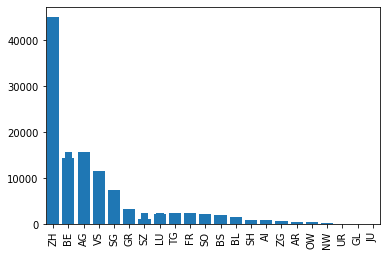

===== VALIDATION ====
BE    441
ZH    208
LU    196
AG    151
VS    126
AR     90
SG     76
SH     61
SZ     58
ZG     56
TG     42
GL     19
NW     13
BL     10
SO     10
OW     10
FR     10
AI      9
Name: canton, dtype: int64


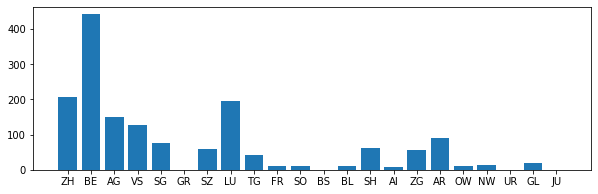

===== TEST ====
BE    425
ZH    277
TG    192
VS    127
LU    118
BL     56
AG     55
FR     55
UR     51
SG     41
AR     39
SO     24
BS     23
OW     19
ZG     18
SZ     10
GR      9
GL      9
Name: canton, dtype: int64


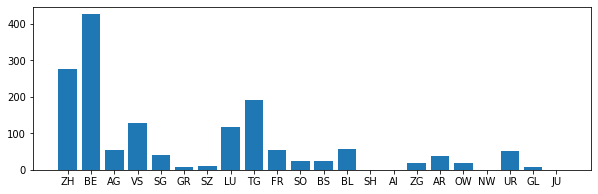

In [ ]:
# get distribution of dialects in the training dataset
train['canton'].value_counts().plot(kind="bar") # get plot 
train['canton'].value_counts() # get numerical values for each dialect 

# get distribution of age in the data sets 
plt.rcParams["figure.figsize"] = (10,3)

possible_keys_canton = data_info["canton"].value_counts().to_dict().keys() # get all possible categories of age  the first time 

print("===== TRAIN ====")
get_distribution(train, "canton", possible_keys_canton)

print("===== VALIDATION ====")
get_distribution(valid, "canton", possible_keys_canton)

print("===== TEST ====")
get_distribution(test, "canton", possible_keys_canton)

===== TRAIN ====
thirties     23051
fifties      21847
fourties     18998
twenties     17773
sixties       5435
teens         3564
seventies      287
eighties        35
Name: age, dtype: int64


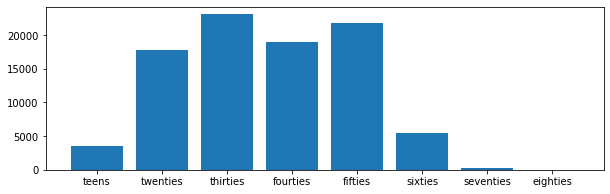

===== VALIDATION ====
thirties    282
twenties    236
fourties    232
sixties      99
teens        75
fifties      51
Name: age, dtype: int64


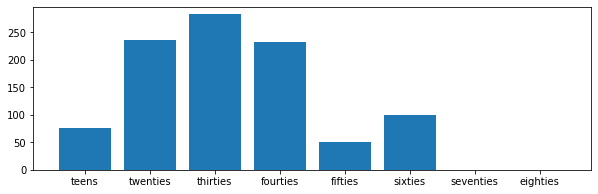

===== TEST ====
fifties     203
thirties    202
twenties    111
fourties     47
sixties      24
Name: age, dtype: int64


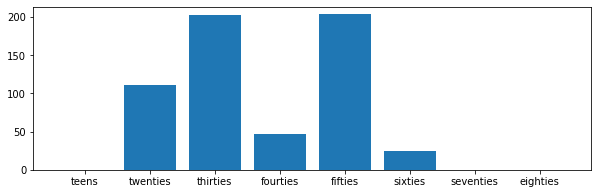

In [ ]:
# get distribution of age in the data sets 
plt.rcParams["figure.figsize"] = (10,3)

# possible_keys = data_info["age"].value_counts().to_dict().keys() # get all possible categories of age  the first time 
possible_keys_age = ["teens", "twenties", "thirties", "fourties", "fifties", "sixties", "seventies", "eighties"] # got all possible keys before and sort them manually 

print("===== TRAIN ====")
get_distribution(train, "age", possible_keys_age)

print("===== VALIDATION ====")
get_distribution(valid, "age", possible_keys_age)

print("===== TEST ====")
get_distribution(test, "age", possible_keys_age)


===== TRAIN ====
In Percentage:
Male:	 47.73380842900548 %
Female:	 19.49493978753761 %
NaN:	 32.734288945893795 %
NaN:	 44280
male      64570
female    26371
other        50
Name: gender, dtype: int64


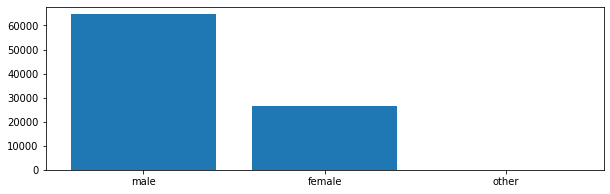

===== VALIDATION ====
In Percentage:
Male:	 19.516217702034087 %
Female:	 7.284222100054976 %
NaN:	 73.19956019791094 %
NaN:	 2663
male      710
female    265
Name: gender, dtype: int64


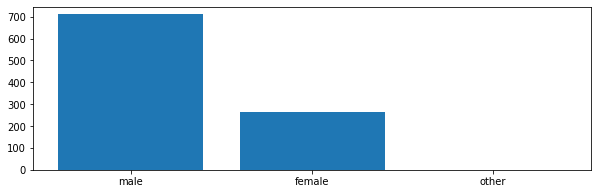

===== TEST ====
In Percentage:
Male:	 9.185918591859187 %
Female:	 6.958195819581958 %
NaN:	 83.80978559648157 %
NaN:	 3049
male      334
female    253
Name: gender, dtype: int64


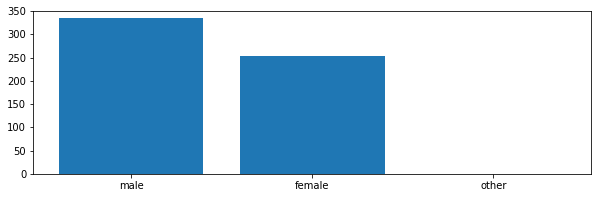

In [ ]:
# get distribution of gender in the datasets 
plt.rcParams["figure.figsize"] = (10,3)

# possible_keys = data_info["age"].value_counts().to_dict().keys() # get all possible categories of age  the first time 
possible_keys_gender = data_info["gender"].value_counts().to_dict().keys() # get all possible categories of age  the first time 

print("===== TRAIN ====")
print("In Percentage:")
print("Male:\t", train["gender"].value_counts()["male"]/ len(train["gender"]) * 100, "%")
print("Female:\t", train["gender"].value_counts()["female"]/ len(train["gender"]) * 100, "%")
print("NaN:\t", train["gender"].isna().sum()/ len(train["gender"]) * 100, "%") # percentage of NaN values in gender 
 
print("NaN:\t", train["gender"].isna().sum()) #number of NaN values in gender  
get_distribution(train, "gender", possible_keys_gender)

print("===== VALIDATION ====")
print("In Percentage:")
print("Male:\t", valid["gender"].value_counts()["male"]/ len(valid["gender"]) * 100, "%")
print("Female:\t", valid["gender"].value_counts()["female"]/ len(valid["gender"]) * 100, "%")
print("NaN:\t", valid["gender"].isna().sum()/ len(valid["gender"]) * 100, "%") # percentage of NaN values in gender  

print("NaN:\t", valid["gender"].isna().sum()) #number of NaN values in gender  
get_distribution(valid, "gender", possible_keys_gender)

print("===== TEST ====")
print("In Percentage:")
print("Male:\t", test["gender"].value_counts()["male"]/ len(test["gender"]) * 100, "%")
print("Female:\t", test["gender"].value_counts()["female"]/ len(test["gender"]) * 100, "%")
print("NaN:\t", test["gender"].isna().sum()/ len(valid["gender"]) * 100, "%") # percentage of NaN values in gender  

print("NaN:\t", test["gender"].isna().sum()) #number of NaN values in gender  
get_distribution(test, "gender", possible_keys_gender)


In [ ]:
# get user mean clip quality (get details)
print("===== TRAINING ====")
print(train["user_mean_clip_quality"].describe())

print("===== VALIDATION ====")
print(valid["user_mean_clip_quality"].describe())

print("===== TEST ====")
print(test["user_mean_clip_quality"].describe())

===== TRAINING ====
count    87741.000000
mean         0.912294
std          0.078698
min          0.048800
25%          0.877200
50%          0.919100
75%          0.976400
max          1.000000
Name: user_mean_clip_quality, dtype: float64
===== VALIDATION ====
count    3638.000000
mean        0.925448
std         0.057669
min         0.760000
25%         0.900000
50%         0.936500
75%         0.967600
max         1.000000
Name: user_mean_clip_quality, dtype: float64
===== TEST ====
count    3636.000000
mean        0.913364
std         0.057035
min         0.703700
25%         0.878000
50%         0.913000
75%         0.952400
max         1.000000
Name: user_mean_clip_quality, dtype: float64


In [ ]:
# get length of sentences in the data sets 
print("===== TRAINING ====")
print(train['sentence'].str.len().describe())

print("===== VALIDATION ====")
print(valid['sentence'].str.len().describe())

print("===== TEST ====")
print(test['sentence'].str.len().describe())


===== TRAINING ====
count    135271.000000
mean         50.902544
std          14.665668
min          15.000000
25%          40.000000
50%          50.000000
75%          61.000000
max         118.000000
Name: sentence, dtype: float64
===== VALIDATION ====
count    3638.000000
mean       50.371083
std        14.372830
min        20.000000
25%        39.000000
50%        49.000000
75%        60.000000
max       107.000000
Name: sentence, dtype: float64
===== TEST ====
count    3636.000000
mean       50.628713
std        14.312284
min        20.000000
25%        39.000000
50%        50.000000
75%        61.000000
max       102.000000
Name: sentence, dtype: float64


In [ ]:
# get duration description of the data sets 
print("===== TRAINING ====")
print(train['duration'].describe())

print("===== VALIDATION ====")
print(valid['duration'].describe())

print("===== TEST ====")
print(test['duration'].describe())

===== TRAINING ====
count    135271.000000
mean          4.743927
std           1.329465
min           2.016000
25%           3.780000
50%           4.536000
75%           5.508000
max          11.160000
Name: duration, dtype: float64
===== VALIDATION ====
count    3638.000000
mean        5.181041
std         1.299759
min         2.268000
25%         4.176000
50%         4.968000
75%         5.904000
max        10.296000
Name: duration, dtype: float64
===== TEST ====
count    3636.000000
mean        5.361703
std         1.339995
min         2.556000
25%         4.356000
50%         5.220000
75%         6.120000
max        10.476000
Name: duration, dtype: float64


In [ ]:
train_long = train[train['duration'] > 6.0]
print(len(train))
print(len(train_long))

135271
22177


# Spontaneous Speech

In [ ]:
# load README for information about the columns in the data file 
with open('/content/drive/MyDrive/Masterarbeit/Data/Schawinski_data/README.md') as readme_schaw:
    print(readme_schaw.read())

# Readme for Schawinski Project: Shared 2020-04-01 with Larissa Schmidt

## Content:
* Audios_Schawinski_Anja_Hasse.tar.bz2: Original audio files from Glaser's server in MP3 format.
* schawinski_exmaralda_transcriptions.tar.bz2: Dieth transcriptions in Exmaralda-format for 7 interviews.
* schawinski_wavs_for_transcripions.tar.bz2: Audio files in wav format that correspond to the transcribed 7 interviews.
* docu_radio.pdf: Documentation regarding specific transcription decisions and used tags.

## Decompressing the tar.bz2 files:
On a linux system with command line:

1. parallel decompression: installing lbzip2:

`sudo apt install lbzip2`

2. decompress:

`tar -I lbzip2 -xf compressed_file.tar.bz`  



In [3]:
# load tsv file with the information about all audio clips and the annotation
schawinski=pd.read_csv("/content/drive/MyDrive/Masterarbeit/Data/Schawinski_data/output/schawinski.csv",sep=',')
schawinski.head(5)

,utt_id,transcription,speaker_id,duration,speech_in_speech,no_relevant_speech
0,Badran_Schawinski_13-05-2013_SPK0-Badran_Schaw...,[music],Badran_Schawinski_13-05-2013_SPK0,26.31,0,1
1,Badran_Schawinski_13-05-2013_SPK0-Badran_Schaw...,[music] da isch di eerschti taakschou vo de wu...,Badran_Schawinski_13-05-2013_SPK0,6.39,0,0
2,Badran_Schawinski_13-05-2013_SPK0-Badran_Schaw...,[music] usem kanton züri danke vill mal dass c...,Badran_Schawinski_13-05-2013_SPK0,4.29,0,0
3,Badran_Schawinski_13-05-2013_SPK0-Badran_Schaw...,[music] [laughter] tu du maal ärklääre wär du ...,Badran_Schawinski_13-05-2013_SPK0,2.05,0,0
4,Badran_Schawinski_13-05-2013_SPK0-Badran_Schaw...,dass isch öppis wo du sälber nöd ganz glaubsch,Badran_Schawinski_13-05-2013_SPK0,2.28,0,0


In [ ]:
print("Dataset size: \t\t", len(schawinski))

Dataset size: 		 4836


0    2568
1    2268
Name: speech_in_speech, dtype: int64


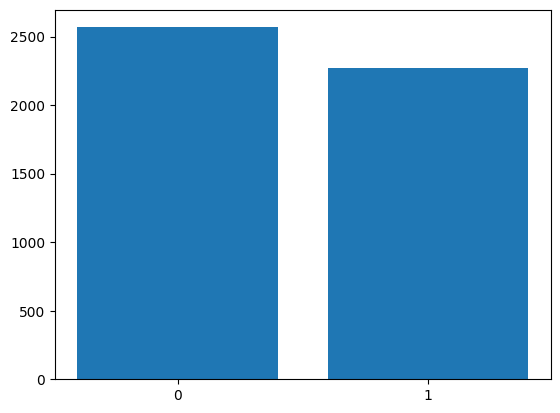

In [ ]:
# get distribution of speech_in_speech column 
possible_keys_sis = schawinski["speech_in_speech"].value_counts().to_dict().keys() # get all possible categories of speech_in_speech column
get_distribution(schawinski, "speech_in_speech", possible_keys_sis)

0    4703
1     133
Name: no_relevant_speech, dtype: int64


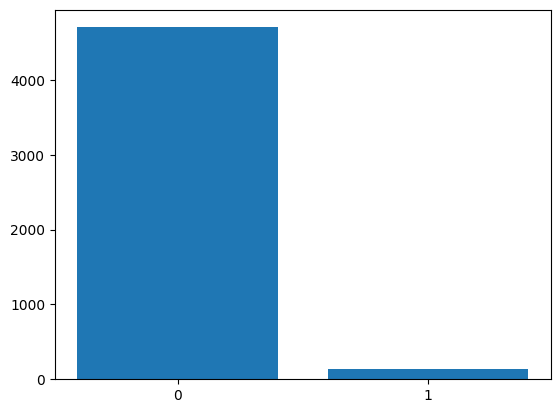

In [ ]:
# get distribution of no_relevant_speech column 
possible_keys_nrs = schawinski["no_relevant_speech"].value_counts().to_dict().keys() # get all possible categories of speech_in_speech column
get_distribution(schawinski, "no_relevant_speech", possible_keys_nrs)

In [ ]:
# get length of sentences in the data sets 
print("===== WHOLE DATASET ====")
print(schawinski['transcription'].str.len().describe())

===== WHOLE DATASET ====
count    4836.000000
mean       44.910877
std        37.518278
min         2.000000
25%        18.000000
50%        18.000000
75%        70.000000
max       224.000000
Name: transcription, dtype: float64


In [ ]:
# get duration of chunks in dataset 
print("===== TRAINING ====")
print(schawinski['duration'].describe())

===== TRAINING ====
count    4836.000000
mean        3.018768
std         2.852274
min         0.130000
25%         1.270000
50%         2.490000
75%         3.990000
max        41.930000
Name: duration, dtype: float64


In [12]:
# check length of dataset, if all not-relevant rows are deleted from the dataset 
schawinski = schawinski[schawinski.transcription != "[music]"]
schawinski = schawinski[schawinski.transcription != "[speech-in-speech]"]
schawinski = schawinski[schawinski.transcription != "[no-relevant-speech]"]

print(len(schawinski))
schawinski

2546


,utt_id,transcription,speaker_id,duration,speech_in_speech,no_relevant_speech
1,Badran_Schawinski_13-05-2013_SPK0-Badran_Schaw...,[music] da isch di eerschti taakschou vo de wu...,Badran_Schawinski_13-05-2013_SPK0,6.39,0,0
2,Badran_Schawinski_13-05-2013_SPK0-Badran_Schaw...,[music] usem kanton züri danke vill mal dass c...,Badran_Schawinski_13-05-2013_SPK0,4.29,0,0
3,Badran_Schawinski_13-05-2013_SPK0-Badran_Schaw...,[music] [laughter] tu du maal ärklääre wär du ...,Badran_Schawinski_13-05-2013_SPK0,2.05,0,0
4,Badran_Schawinski_13-05-2013_SPK0-Badran_Schaw...,dass isch öppis wo du sälber nöd ganz glaubsch,Badran_Schawinski_13-05-2013_SPK0,2.28,0,0
6,Badran_Schawinski_13-05-2013_SPK0-Badran_Schaw...,ganz normaal und so ezetera,Badran_Schawinski_13-05-2013_SPK0,1.53,0,0
...,...,...,...,...,...,...
4784,Schaeppi_Schawinski_22-04-2013_SPK1-Schaeppi_S...,/ [breath_mouth_noise] / das weesentliche,Schaeppi_Schawinski_22-04-2013_SPK1,5.39,0,0
4785,Schaeppi_Schawinski_22-04-2013_SPK1-Schaeppi_S...,ist fü di augen unsichtbaar,Schaeppi_Schawinski_22-04-2013_SPK1,2.76,0,0
4787,Schaeppi_Schawinski_22-04-2013_SPK1-Schaeppi_S...,dem härzen guut,Schaeppi_Schawinski_22-04-2013_SPK1,1.49,0,0
4788,Schaeppi_Schawinski_22-04-2013_SPK1-Schaeppi_S...,und wenn du den himel anschaust wenn ich dann ...,Schaeppi_Schawinski_22-04-2013_SPK1,4.23,0,0


Meier_Schawinski_07-04-2014_SPK1          276
Fiala_Schawinski_19-03-2012_SPK1          257
Badran_Schawinski_13-05-2013_SPK1         246
Hafner_Schawinski_05-11-2012_SPK1         211
Moergeli_Schawinski_07-05-2012_SPK1       211
Schaeppi_Schawinski_22-04-2013_SPK1       202
Guggenbuehl_Schawinski_23-09-2013_SPK1    201
Badran_Schawinski_13-05-2013_SPK0         166
Moergeli_Schawinski_07-05-2012_SPK0       152
Schaeppi_Schawinski_22-04-2013_SPK0       149
Meier_Schawinski_07-04-2014_SPK0          139
Fiala_Schawinski_19-03-2012_SPK0          126
Guggenbuehl_Schawinski_23-09-2013_SPK0    124
Hafner_Schawinski_05-11-2012_SPK0          86
Name: speaker_id, dtype: int64


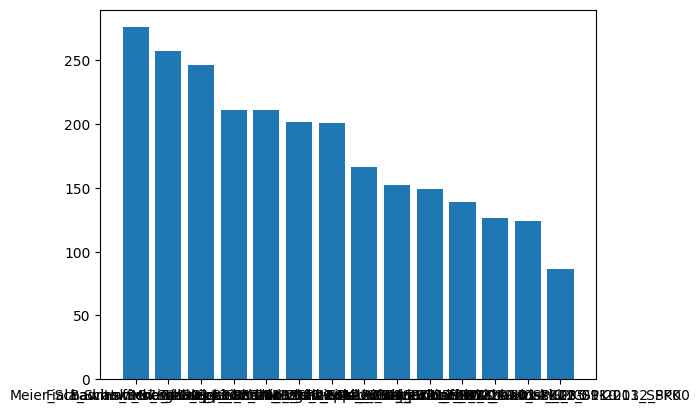

In [13]:
# get distribution of speaker_ids after deleting no relevant entries from dataframe 
possible_keys_speaker = schawinski["speaker_id"].value_counts().to_dict().keys() # get all possible categories of speech_in_speech column
get_distribution(schawinski, "speaker_id", possible_keys_speaker)

In [19]:
# get percentage for validation and test 
size = len(schawinski)
test_size = size * 0.1 
valid_size = size * 0.1 
train_size = size * 0.8
print(round(train_size), round(valid_size), round(test_size))

2037 255 255
